In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Define image size
IMAGE_SIZE = [244, 244]

In [3]:
# Define directories
train_directory = r"C:\Users\ken\OneDrive\Desktop\img.class\melon_dataset\train"
test_directory = r"C:\Users\ken\OneDrive\Desktop\img.class\melon_dataset\test"
val_directory = r"C:\Users\ken\OneDrive\Desktop\img.class\melon_dataset\val"

In [4]:
# Load the saved model
saved_model_path = 'melon_species_DenseNet169.h5'
loaded_model = load_model(saved_model_path, compile=False)

In [5]:
# Define the labels
labels = {
    0: 'BITTER MELON',
    1: 'CHARENTAIS MELON',
    2: 'CHENSHAW MELON',
    3: 'CUCA MELON',
    4: 'GAC MELON',
    5: 'HORNED MELON',
    6: 'PEPINO MELON',
    7: 'PERSIAN MELON',
    8: 'WATERMELON',
    9: 'WINTER MELON',
}

In [6]:
# Define data generators
test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory(
    test_directory,
    target_size=(IMAGE_SIZE[0], IMAGE_SIZE[1]),
    batch_size=1,  # Set batch size to 1 for prediction
    class_mode='categorical',  # Adjust if using different class mode
    shuffle=False  # Important to keep the order of predictions
)

Found 550 images belonging to 10 classes.


In [7]:
# Make predictions on the test set
y_pred_prob = loaded_model.predict(test_set)
y_pred = np.argmax(y_pred_prob, axis=1)

550/550 [==============================] - 72s 126ms/step


In [8]:
# Get the true labels
y_true = test_set.classes

In [9]:
# Create a confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

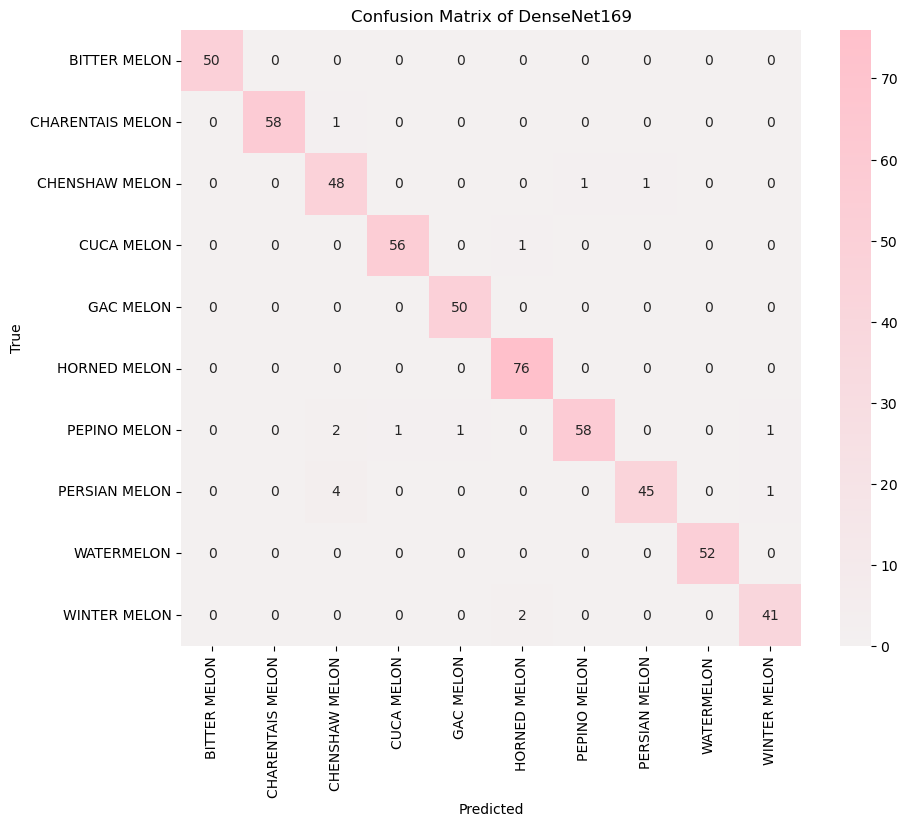

In [10]:
# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap=sns.light_palette("pink", as_cmap=True), xticklabels=labels.values(), yticklabels=labels.values())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix of DenseNet169')
plt.show()